<small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/IASAC-UMH.png width="450" height="200"></small>


# <font color="steelblue">30.Primeros pasos con Scikit-Learn I</font>

**Autoría**: 

Fernando Borrás (f.borras@umh.es), Federico Botella (federico@umh.es),  Inés Hernández (ines.hernandezp@umh.es), Mª Asunción Martínez Mayoral (asun.mayoral@umh.es), Josep Moltó (j.molto@umh.es), Javier Morales (j.morales@umh.es) 

Departamento de Estadística, Matemáticas e Informática. 

Universidad Miguel Hernández de Elche. 


**Financiación**: El material que aparece a continuación se ha desarrollado dentro del marco del proyecto UNIDIGITAL- IASAC.

**Fecha última edición**: 16/11/2022

**Licencia**: <small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /></small>




# <font color="steelblue">Introducción</font>

**Descripción:** En este cuaderno introducimos el módulo Scikit-Learn que es el referente en los algoritmos de aprendizaje automático dentro del entorno Python, comentando los elementos base y el preprocesado de tablas de datos, así como la partición de muestras de entrenamiento y test y el preprocesado global con *pipe*.

**Nivel de Formación:** A/**B**/C. Material para estudiantes de grado y postrago que desean introducirse en los procesos de Machine Learning o Aprendizaje Automático.

**Recomendaciones antes de usarlo:** Conocimientos básicos del lenguaje Python, conceptos básicos de probabilidad y análisis exploratorio de datos.


## <font color="steelblue">Objetivos de aprendizaje</font>

- Conocer los fundamentos de la librería Scikit-Learn para el preprocesado de bases de datos.
- Descubrir el formato de los bancos de datos para su tratamiento con Scikit-Learn.
- Identificar los tipos de variables en una base de datos.
- Descubrir problemas en los datos que requieren un preprocesado para trabajar con modelos de aprendizaje automático.
- Preprocesar la información en una base de datos, en función del tipo de variables.
- Tratar los valores faltantes en un banco de datos.
- Dividir la muestra en submuestras de entrenamiento y validación.
- Preprocesar de modo integrado un banco de datos completo.


## <font color="steelblue">Contenidos</font>

1. Librería Scikit-Learn
1. Tablas de datos en Scikit-Learn
1. Preprocesado de datos
  - Tipos de variables
  - Valores perdidos
  - Variables categóricas
  - Variables numéricas
  - División de muestras para entrenamiento y validación
  - Preprocesado integral con *Pipeline*
1. Referencias y enlaces de interés


# <font color="steelblue">Preliminares</font>

## <font color="steelblue">Librerías </font>

Las librerías o módulos que precisamos en este cuaderno son:

In [ ]:
from io import StringIO 
import sys
import numpy as np      
import pandas as pd     
import math             

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

## <font color="steelblue">Bancos de datos</font>

A continuación presentamos los bancos de datos que vamos a utilizar en este cuaderno, y se proporciona el código para cargarlos. Se puede consultar una descripción detallada en el cuaderno de introducción a los bancos de datos de trabajo.

**stroke**: Este conjunto de datos se utiliza para predecir si un paciente tiene más o menos probabilidad de sufrir un ictus, en función de su género, edad, enfermedades y estatus de fumador. Cada fila en los datos proporciona información relevante sobre cada paciente. Las variables predictoras son `gender`, `age`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `avg_glucose_level`, `bmi`, `smoking_status`, mientras que la variable respuesta, que en este caso es categórica, es `stroke` con valores `Yes` y `No`.

**mushrooms**: La "caza de setas" (también conocida como "shrooming" en inglés) está disfrutando de nuevos picos de popularidad. Conocer qué características de las setas implican una muerte segura y en base a qué resultan más apetecibles, son aspectos de interés. Este conjunto de datos muestra las características de una muestra muy extensa de diferentes tipos de setas. En concreto se incluyen descripciones de 23 especies de setas con agallas de la familia *Agaricus* y *Lepiota*, extraídas de *The Audubon Society Field Guide to North American Mushrooms* (1981). Cada especie se identifica mediante la variable respuesta `classes`m con respuestas "comestible" y "venenosa".

Las variables predictoras son `cap-shape`, `cap-surface`, `cap-color`, `bruises`, `gill-attachment`, `gill-spacing`, `gill-size`, `gill-color`, `stalk-shape`, `stalk-root`, `stalk-surface-above-ring`, `stalk-surface-below-ring`, `stalk-color-above-ring`, `stalk-color-below-ring`, `veil-type`, `veil-color`, `ring-number`, `ring-type`, `spore-print-color`, `population`, y `habitat`.

**alcohol**: Los datos de consumo de alcohol entre adolescentes se obtuvieron en una encuesta realizada a los alumnos de los cursos de matemáticas y lengua portuguesa de enseñanza secundaria. Además de las variables referidas al consumo, se dispone de mucha información social, de género y de estudio, de interés sobre los estudiantes. En este caso no disponemos de variable respuesta.

Las variables predictoras consideradas son `school`, `sex`, `age`, `address` , `famsize`, `Pstatus`, `Medu`, `Fedu`, `Mjob`, `Fjob`, `reason`,`guardian`, `traveltime`, `studytime`, `failures`, `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`,  `internet`, `romantic`, `famrel`, `freetime`, `goout`, `Dalc`, `Walc`, `health`, `absences`, `G1`, `G2`, y `G3`.

**winequality**: Este banco de datos trata de predecir la calidad (`quality`), medida en la escala discreta de 0 a 10, de las diferentes variantes rojas del vino portugués *Vinho Verde*, en función de diferentes variables fisicoquímicas (predictoras).

Las variables fisicoquímicas consideradas son: `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `pH`, `sulphates`, y `alcohol`.

El código de lectura de los bancos de datos propuestos es:

In [ ]:
# CARGA DE LOS BANCOS DE DATOS EN EL CUADERNO
# Stroke Prediction Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/stroke_ori.csv'
stroke = pd.read_csv(url)
# Mushroom classification
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/mushrooms.csv'
mushrooms = pd.read_csv(url)
# Student Alcohol Consumption
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/student-mat.csv'
alcohol = pd.read_csv(url)
# Winequality-red
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/winequality-red.csv'
winequality = pd.read_csv(url)

In [ ]:
winequality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
pd.value_counts(alcohol['traveltime'])

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

In [ ]:
alcohol.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
alcohol.shape[0]

395

# <font color="steelblue">Librería Scikit-Learn</font>

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de aprendizaje automático. Una de las más conocidas es [Scikit-Learn](http://scikit-learn.org), que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Se caracteriza por una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. Un beneficio de esta uniformidad es que, una vez comprendes el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, utilizar un nuevo modelo o algoritmo es muy sencillo.


Comenzamos por ver cómo interpreta Scikit-Learn un conjunto de datos para la implementación de los diferentes algoritmos de aprendizaje automático. 

# <font color="steelblue">Tablas de datos en Scikit-Learn</font>

El aprendizaje automático crea modelos a partir de datos, que necesariamente han de proporcionarse bien estructurados y preprocesados. Por esa razón, nos detenemos en primer lugar en mostrar cómo organizar los datos para que los módulos de análisis puedan trabajar con ellos eficientemente. En la situación más sencilla la información para analizar o modelizar se debe estructurar como una **tabla de datos**.

Una **tabla de datos** es una cuadrícula bidimensional de la información recogida, en la que las filas (a las que aludiremos como "muestras") representan elementos individuales del conjunto de datos y las columnas contienen información relacionada con cada una de las variables observadas. Para ejemplificar lo que es una tabla de datos consideramos el [conjunto de datos de Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), analizado por Ronald Fisher en 1936, y que es muy habitual como ejemplo en los procedimientos de aprendizaje automático. 

Este conjunto de datos intenta analizar la taxonomía de tres tipos de flores *Iris* en función de las longitudes y anchuras de los pétalos y sépalos. El conjunto de datos contiene 150 muestras u observaciones. Dado que es un conjunto de datos muy utilizado, ya viene precargado en muchos módulos de Python, en formato de  ``DataFrame`` de `Pandas`, y no es necesario descargarlo para ser utilizado. En este caso hemos optado por cargarlo a partir de la librería [Seaborn](http://seaborn.pydata.org/). A continuación se muestran las primeras muestras del conjunto de datos:

In [ ]:
# Cargamos los datos
iris = sns.load_dataset('iris')
# Mostramos las primeras muestras
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


En la tabla, cada fila de datos representa una flor observada, y el número total de filas es el número de flores en el conjunto de datos. Nos referiremos a las filas de la matriz como 'muestras' y al número de filas como 'n_muestras'. Asimismo, cada columna contiene la información cuantitativa o cualitativa recopilada en las diversas variables observadas, y que describe cada muestra. Nos referiremos a las columnas de la matriz como 'variables' y al número de columnas como 'n_variables'. El número de variables respuesta dentro de la tabla de datos se denota por 'n_respuestas' y por defecto asumiremos que existe una única respuesta, y por lo tanto que dicho valor es 1.

En función del objetivo principal que se persigue con un conjunto de datos en particular, la tabla de datos se suele dividir a su vez en dos matrices:

* **Matriz de predictoras**: por convención se denota por $X$, es una matriz de dimensión 'n_muestras $\times$ (n_variables-1)', que se almacena habitualmente como una matriz `NumPy` o un `DataFrame` de `Pandas` para facilitar su manipulación. Con todo, algunos de los modelos `Scikit-Learn` también aceptan matrices dispersas del módulo `SciPy`. 


Si nuestro objetivo es la clasificación de las flores *Iris*, identificando la clase más probable para cada elemento de la muestra, la matriz de predictoras viene dada por:

In [ ]:
# variables características
var_car = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# matriz de características
X = iris[var_car]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# dimensiones de la matriz
X.shape

(150, 4)

* **Matriz o vector de respuestas**: por convención se suele denotar por $Y$, y es una matriz de dimensión 'n_muestras $\times 1$', que contiene una etiqueta o valor numérico (identificado como objetivo del modelo) sobre el que queremos aprender a partir de la información contenida en $X$. En la terminología habitual de los modelos de aprendizaje automático, esta matriz se suele denominar *'target'*. Como la matriz de predictoras se puede almacenar como una matriz `NumPy` o un `DataFrame` de `Pandas`, si disponemos de más de un objetivo, la matriz de respuestas será de dimensión 'n_muestras $\times$ n_respuestas'. 

Si no disponemos de ninguna respuesta, como en el aprendizaje no-supervisado, sólo hablaremos de una matriz de predictoras, de dimensión 'n_muestras $\times$ n_variables'. 


Para los datos de *Iris* la variable objetivo es `species`, que representa la etiqueta asignada a cada una de las muestras registradas:

In [ ]:
# matriz objetivo
Y = iris['species']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
# dimensiones de la matriz
Y.shape

(150,)

Dado que el objetivo principal en el aprendizaje automático con modelos supervisados es establecer patrones de relación entre las variables predictoras y la variable respuesta, el primer paso a dar consiste en la descripción numérica y/o gráfica de las variables disponibles, especialmente en su relación con la respuesta. Más adelante desarrollaremos este tema con detalle.

Veamos gráficamente la información contenida en el banco de datos *Iris*.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


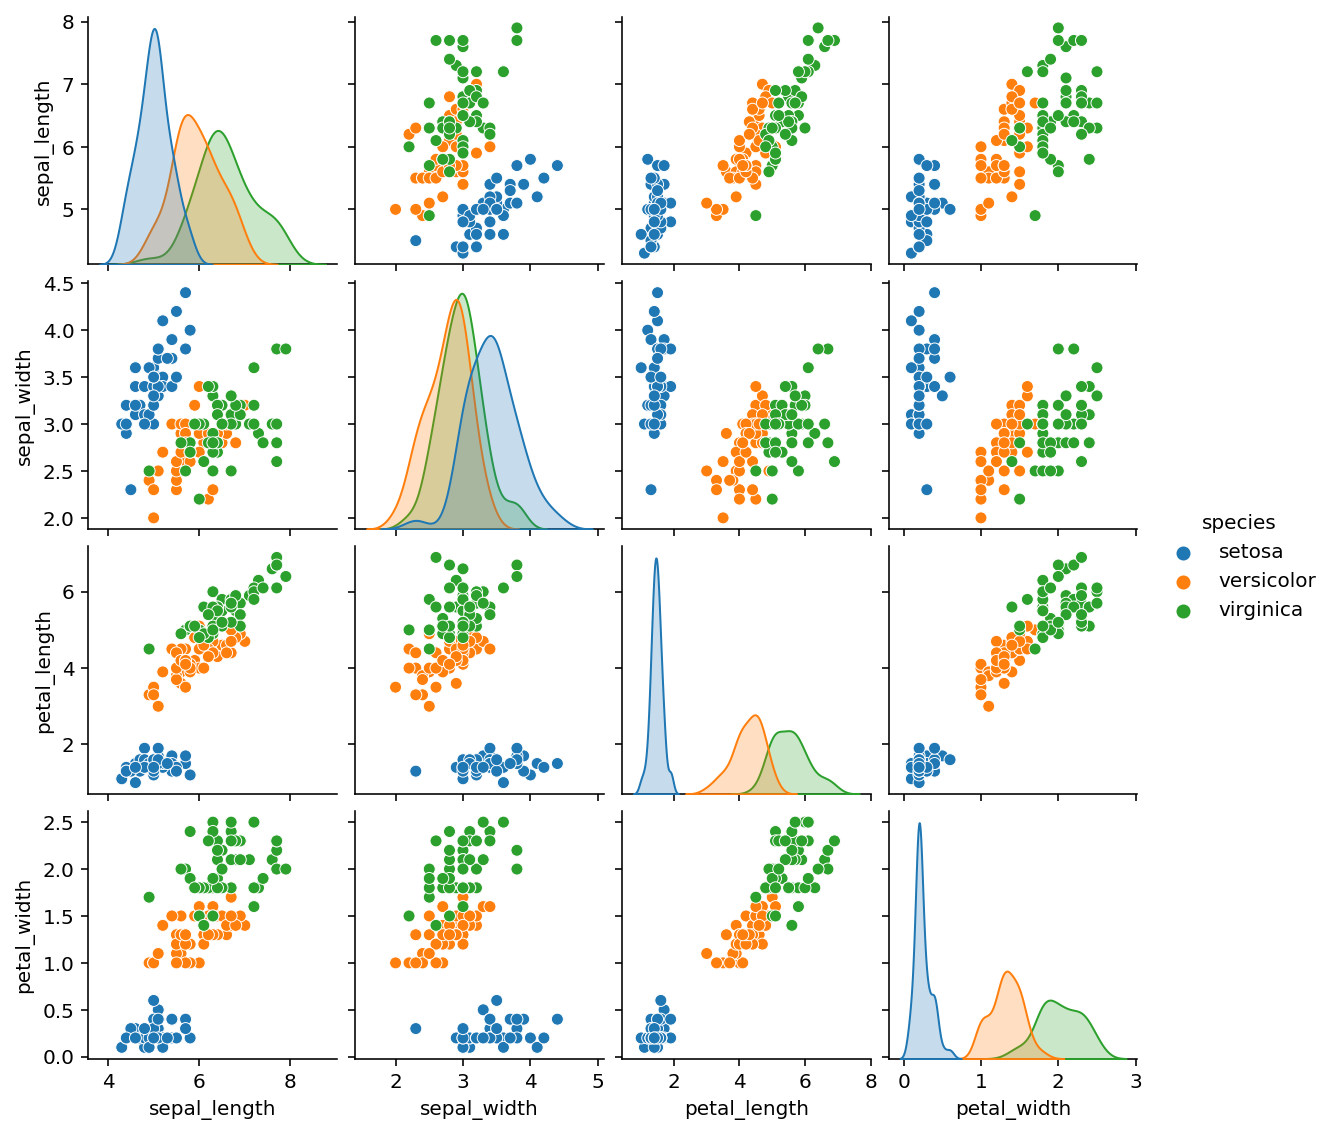

In [ ]:
sns.pairplot(iris, hue = 'species', size = 2);


En el gráfico de asociación apreciamos la relación entre todas las variables disponibles para las tres especies observadas. En la diagonal se muestran las distribuciones univariadas de cada una de las variables en cada especie (representada en colores distintos). Fuera de la diagonal aparecen los gráficos de puntos que hablan sobre la asociación entre las características observadas, también diferenciados por colores para las tres especies.  

# <font color="steelblue">Preprocesado de datos</font>

El preprocesado de datos engloba todas las tareas relacionadas con el tratamiento de la base de datos en bruto, para convertirla en una base de datos eficiente y fácil de utilizar para su análisis con modelos de aprendizaje automático. 

Entre estas tareas se integran:

* Identificación de los tipos de cada una de las variables de la tabla de datos.
* Identificación y tratamiento de valores perdidos.
* Tratamiento de variables de categóricas.
* Tratamiento de variables numéricas.
* División del conjunto de datos en muestras de entrenamiento y validación.
* Preprocesado conjunto de un banco de datos (con *pipeline*).

Veamos en detalle cómo afrontar cada una de estas tareas.

## <font color="steelblue">Tipos de variables</font>

Los tipos de variables más comunes en la práctica son: 

* `category` u `object` para variables categóricas. Si las categorías están ordenadas, podemos añadir el orden en la definición del tipo.
* `int` para variables numéricas de tipo entero.
* `float` para variables numéricas con decimales.
* `string` para variables que contienen cadenas de texto.
* `boolean` para variables que contienen condiciones lógicas (verdadero/falso).
* `datetime` para variables que contienen información sobre fechas y horas.

Para identificar y modificar el tipo de las variables en una tabla de datos usamos las siguientes funciones de la librería `Pandas`:

* `dtypes` sirve para identificar el tipo de variable;
* `astype()` modifica el tipo de variable;
* `select_dtype()` selecciona todas las variables de un tipo especifíco dentro de la tabla de datos;
* `CategoricalDtype()` convierte variables categóricas a ordinales.


### Ejemplo 1

Para mostrar el uso de estas funciones vamos a utilizar el conjunto de datos [`alcohol`](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption) presentado al inicio de este cuaderno. 

En primer lugar inspeccionamos la tabla de datos a partir de los primeros registros y todas sus variables, e identificamos los tipos de cada una de las variables disponibles.

In [ ]:
# Tabla de datos
alcohol.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Tipos de variables
alcohol.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

La base de datos contiene pues exclusivamente variables de tipo `object`, que se corresponden con las variables categóricas, y de tipo `int64`, que identifican variables numéricas. Para trabajar de foma más eficiente convertimos las variables de tipo `object` al tipo `category`.

In [ ]:
# Seleccionamos los nombres de la columnas que corresponden con el tipo object 
cat_names = alcohol.select_dtypes(include=['object']).columns.values
# Convertimos dichas columnas a tipo category
alcohol[cat_names] = alcohol[cat_names].astype("category")
# Vemos el resultado 
alcohol.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

Por otro lado tenemos ciertas variables de tipo categórico que contienen información ordinal, pero que al ser codificadas con números se interpretan como `int64`. Dichas variables son: 

* `Medu` con valores enteros: `0 - none`, `1 - primary education (4th grade)`, `2 – 5th to 9th grade`, `3 – secondary education` or `4 – higher education`.
* `Fedu` con valores enteros: `0 - none`, `1 - primary education (4th grade)`, `2 – 5th to 9th grade`, `3 – secondary education` or `4 – higher education`.
* `famsize` con valores `LE3` - less or equal to 3 or `GT3` - greater than 3).
* `famrel` con valores de `1` a `5`.
* `freetime` con valores de `1` a `5`.
* `goout` - con valores de `1` a `5`.
* `Dalc` - con valores de `1` a `5`.
* `Walc` - con valores de `1` a `5`.
* `health` - con valores de `1` a `5`.

Para convertir estas variables enteras a categóricas usamos la función `astype` a continuación.




In [ ]:
# Seleccionamos los nombres de la columnas que corresponden con el tipo int64 que queremos convertir a categóricas
cat_names = ['Medu', 'Fedu', 'famsize', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
# Convertimos dichas variables a categóricas
alcohol[cat_names] = alcohol[cat_names].astype("category")
# Vemos el resultado 
alcohol.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

Si además queremos añadir la información ordinal, las transformamos a continuación en ordinales con la función de `Pandas` [`CategoricalDtype()`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html?highlight=categoricaldtype#pandas.CategoricalDtype). 

En los modelos de aprendizaje, en general bastará con reconocer este tipo de variables como categóricas y no suele ser necesario utilizar información ordinal.

Veamos cómo se procede para incorporar información ordinal en una de estas variables ya categorizadas.

In [ ]:
# Para convertir la variable Fedu a ordinal, ordenamos primero sus valores
cats_to_order = sorted(alcohol.Fedu.unique())
print(cats_to_order)
# las convertimos en etiquetas ordenadas, bajo un tipo 'category'
cats_dtype = pd.api.types.CategoricalDtype(cats_to_order, ordered = True)
print(cats_dtype)
# y asignamos el tipo de dichas etiquetas a la variable Fedu
alcohol.Fedu = alcohol.Fedu.astype(cats_dtype)
alcohol.Fedu.dtype

[0, 1, 2, 3, 4]
category


CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True)

### Ejemplo 2

Abordamos ahora un ejemplo algo más complicado, basado en el banco de datos `stroke`. En primer lugar identificamos los tipos de variables presentes en el banco de datos, y reconocemos como identificador de los registros (filas), la columna `id`.

In [ ]:
# Creación del índice
stroke.set_index('id')
# Tipos de carcaterísticas
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

Reconvertimos a los tipos adecuados: las variables de tipo `object` y las `int64` que son 0-1 las transformamos en tipo `category`.

In [ ]:
# Seleccionamos los nombres de la columnas que corresponden con el tipo object 
cat_names = stroke.select_dtypes(include=['object']).columns.values
# Convertimos dichas columnas a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")
# Seleccionamos los nombres de la columnas que corresponden con el tipo int64 que son cualitativas 
cat_names = stroke.select_dtypes(include=['int64']).columns.values
# Convertimos dichas columnas a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")
# Vemos el resultado 
stroke.dtypes

id                   category
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

## <font color="steelblue">Valores perdidos</font>

Los conjuntos de datos con valores pérdidos (NaN) son incompatibles con los estimadores Scikit-Learn ya que  estos asumen que todos los valores de una matriz deben expresarse numéricamente. Por ese motivo, una de las principales tareas de preprocesado consiste en el tratamiento de los valores perdidos presentes en una tabla de datos. Las estrategias básicas son:

1. Eliminación de las muestras con datos faltantes.
2. Imputación de valores (univariada o multivariante).

La opción más habitual en el tratamiento de modelos de aprendizaje automático es la imputación de valores perdidos, pero siempre hay que proceder con cautela para tener ciertas garantías de no modificar la tabla de datos para generar conclusiones erróneas. Hemos de tener en cuenta que habitualmente la imputación se realiza sobre la matriz de variables predictoras que son las que utilizamos para entrenar el modelo de aprendizaje automático. Si tenemos un conjunto de muestras con valores perdidos en la variable o variables respuesta, lo habitual es eliminar dichas observaciones de la tabla de datos.

### Eliminar muestras


En primer lugar estudiamos cómo eliminar las muestras de una tabla de datos que contienen valores perdidos. Sin embargo, hay que llevar cuidado con la eliminación de muestras ya que podemos perder mucha información valiosa para el análisis, sobre todo cuando el número de valores perdidos es relevante en comparación con el número de muestras totales. 


Para la identificación de datos faltantes podemos utilizar la función `isnull()` y también la librería `missingno`.
```
datos.isnull()
```

Para la eliminación de los datos faltantes hacemos uso de la función [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html), de `Pandas`, que nos permite diferentes opciones de filtrado y eliminación de dichos valores. Los parámetros básicos de configuración de la función son:

* **`how = {'all','any'}`**:  si es `'all'` solo elimina las filas en las que todas las columnas son NaN y si es `'any'` las elimina si hay algún NaN en ellas.
* **`thresh = n`**: elimina las filas que tienen menos de $n$ valores no faltantes.
* **`subset=['x']`**: solo elimina las filas con valores NaN
en la columna $x$.
* **`axis = {0,1}`**: si es 0 o 'index' elimina las filas que contienen valores perdidos, y si es 1 o 'columns', elimina las columnas que contienen los valores perdidos.
* **`inplace = {True, False}`**: si es 'True' el método dropna modificará el `DataFrame` directamente. 


#### Ejemplo 3

Partimos de una tabla de datos que definimos, con valores faltantes identificados como 'np.nan'.

In [ ]:
# partimos de una tabla de datos con valores faltantes
datos = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6],
    'B': [7, 8, np.nan, 10, np.nan, 12],
    'C': [13, 14, np.nan, np.nan, 17, 18],
    'D': [19, np.nan, 21, 22, 23, 24],
    'E': [25, 26, 27, 28, 29, 30]

})
datos

,A,B,C,D,E
0,1,7.0,13.0,19.0,25
1,2,8.0,14.0,NaN,26
2,3,NaN,NaN,21.0,27
3,4,10.0,NaN,22.0,28
4,5,NaN,17.0,23.0,29
5,6,12.0,18.0,24.0,30


Automatizamos la identificación y conteo de valores faltantes con:



In [ ]:
# Valores perdidos por variable
datos.isnull().sum()

A    0
B    2
C    1
D    1
E    0
dtype: int64

También podemos identificar gráficamente al existencia de datos faltantes mediante la librería `missingno`, que rellena una matriz de filas-columnas dejando huecos en las posiciones con valores faltantes del banco de datos.

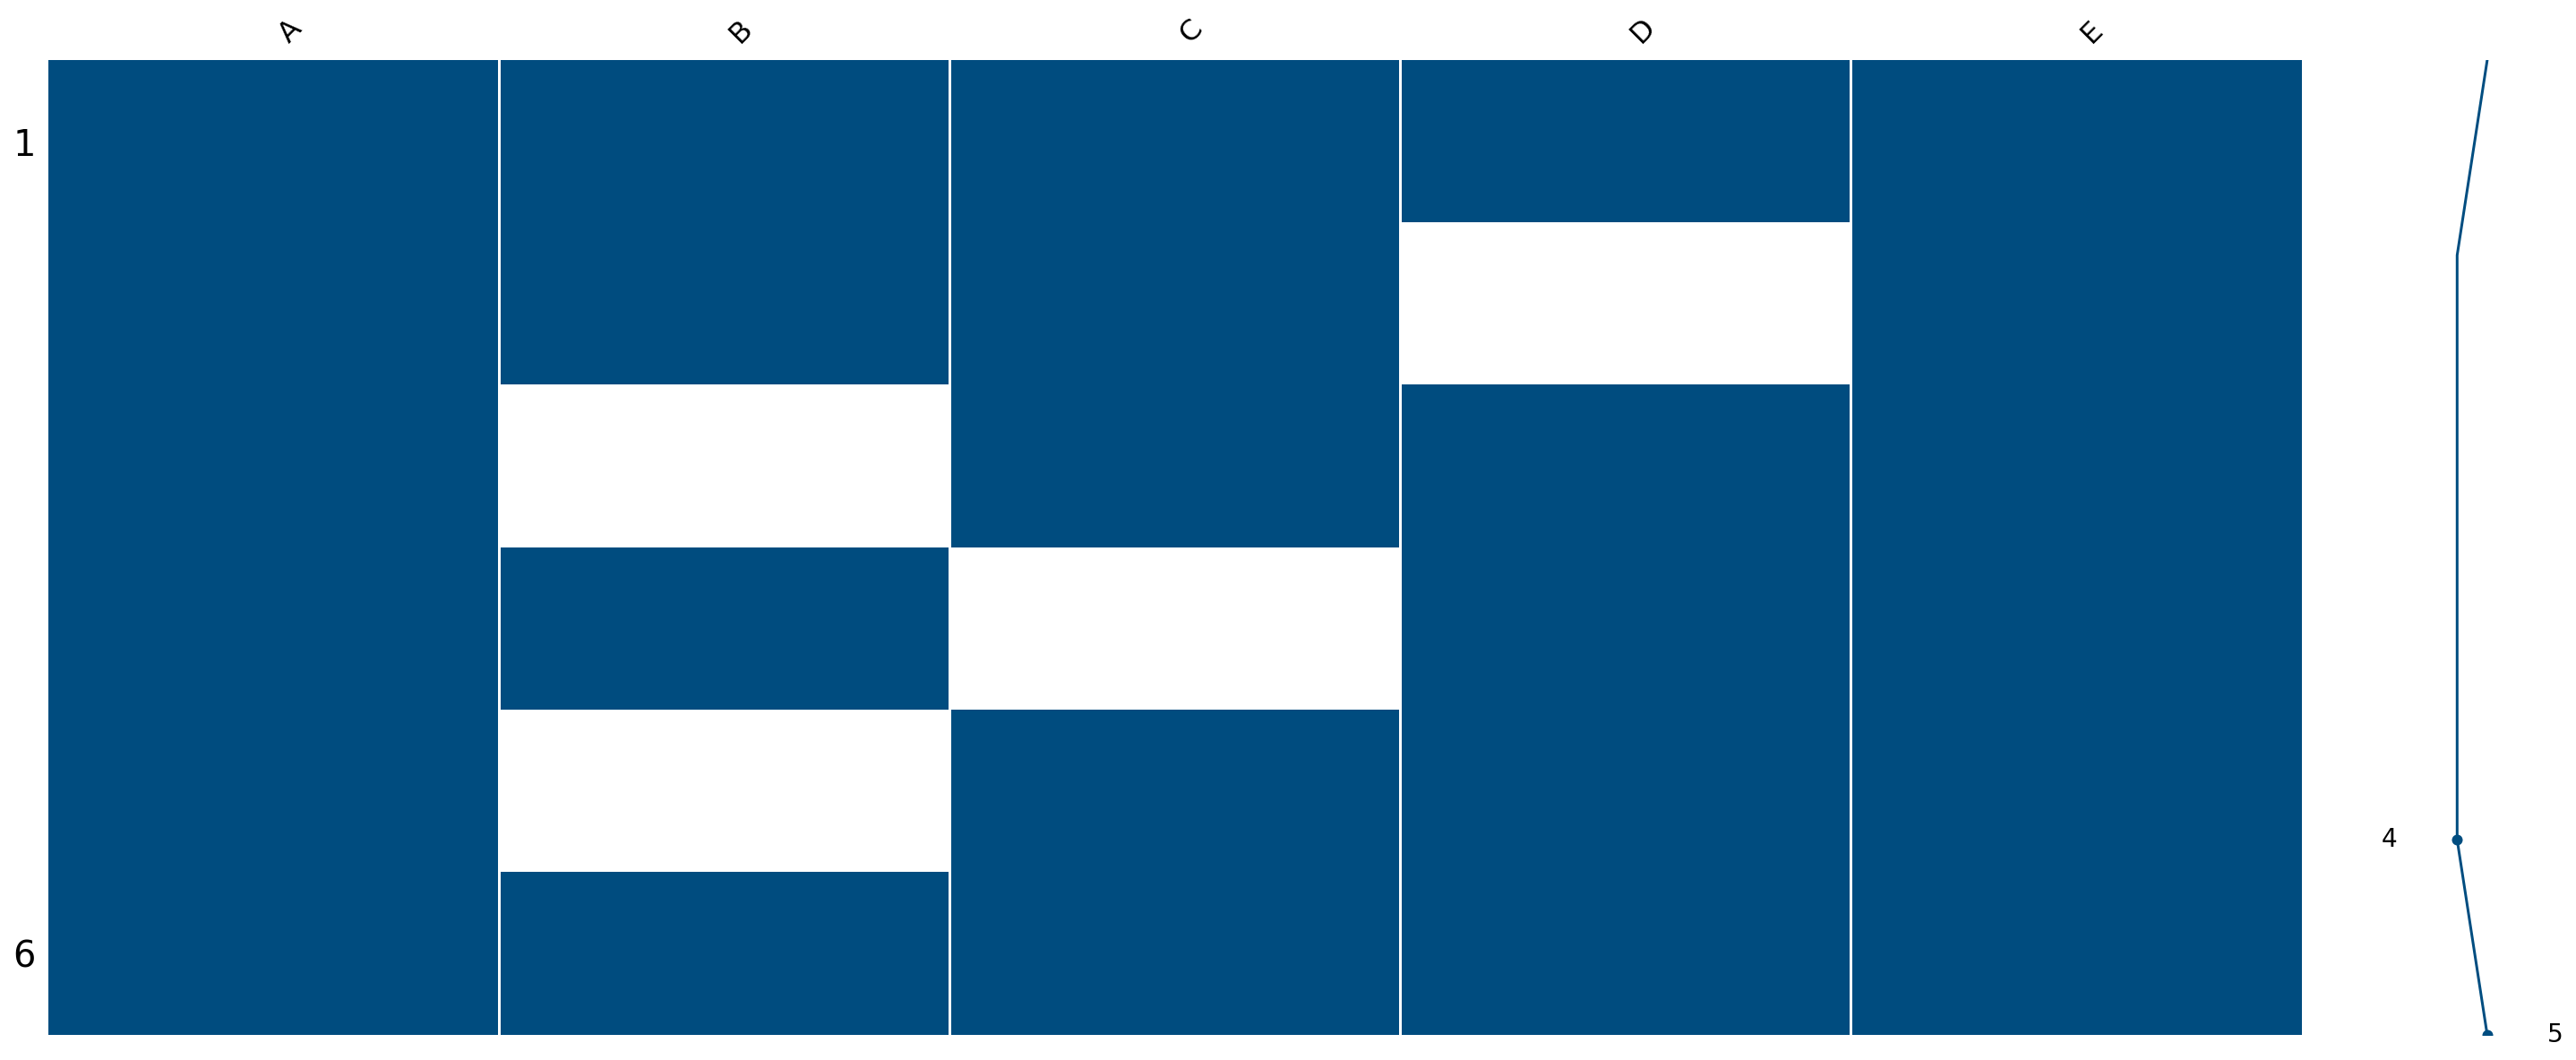

In [ ]:
import missingno as msno
# Solución
fig = msno.matrix(datos,color=(0,0.3,0.5))

Una vez identificados los valores faltantes, los eliminamos, con las diferentes opciones que nos da la función `dropna()`.

In [ ]:
# Eliminamos todas las filas con NaN
datos.dropna()

,A,B,C,D,E
0,1,7.0,13.0,19.0,25
5,6,12.0,18.0,24.0,30


In [ ]:
# Eliminamos todas las columnas con Nan
datos.dropna(axis=1)  

,A,E
0,1,25
1,2,26
2,3,27
3,4,28
4,5,29
5,6,30


In [ ]:
# Eliminamos las filas en que todas sus columnas sean NaN
datos.dropna(how='all')   
# (quedan todas las filas, pues ninguna es enteramente de valores faltantes)

,A,B,C,D,E
0,1,7.0,13.0,19.0,25
1,2,8.0,14.0,NaN,26
2,3,NaN,15.0,21.0,27
3,4,10.0,NaN,22.0,28
4,5,NaN,17.0,23.0,29
5,6,12.0,18.0,24.0,30


In [ ]:
# Eliminamos las filas que tienen menos de 4 valores completos (no faltantes)
datos.dropna(thresh=4)   

,A,B,C,D,E
0,1,7.0,13.0,19.0,25
1,2,8.0,14.0,NaN,26
3,4,10.0,NaN,22.0,28
4,5,NaN,17.0,23.0,29
5,6,12.0,18.0,24.0,30


In [ ]:
# Eliminamos las muestras donde la variable 'C' tiene NaN 
datos.dropna(subset=['C']) 

,A,B,C,D,E
0,1,7.0,13.0,19.0,25
1,2,8.0,14.0,NaN,26
2,3,NaN,15.0,21.0,27
4,5,NaN,17.0,23.0,29
5,6,12.0,18.0,24.0,30


In [ ]:
# Sustituimos la tabla original por una sin muestras (filas) con menos de 4 datos completos
datos.dropna(thresh=4,inplace=True)
print(datos)

   A     B     C     D   E
0  1   7.0  13.0  19.0  25
1  2   8.0  14.0   NaN  26
3  4  10.0   NaN  22.0  28
4  5   NaN  17.0  23.0  29
5  6  12.0  18.0  24.0  30


### Imputar valores

La imputación de valores perdidos tiene por objetivo sustituir dichos valores por otros que sean compatibles con la información contenida en la tabla de datos. Las formas habituales de imputación son:  

* Univariada, o asociada a una única variable de la tabla de datos, de forma que la imputación se realiza sobre los valores faltantes en una variable, utilizando solo los valores observados para dicha variable. 

* Multivariante, o asociada a un conjunto de variables, de forma que se utiliza todo el conjunto de variables disponibles para estimar los valores que faltan.

Para proceder con la imputación ytilizamos los módulos [``sklearn.impute``](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) y [``sklearn.experimental``](https://scikit-learn.org/stable/modules/generated/sklearn.experimental.enable_iterative_imputer.html), que incorporan varios métodos de imputación distintos:

* [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simple%20imputer#sklearn.impute.SimpleImputer), para imputación univariada.
* [`IterativeImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=iterativeimputer#sklearn.impute.IterativeImputer), para imputación multivariante.

A continuación se muestra el uso de dichas funciones en algunos ejemplos.

Antes de desglosar los diferentes procedimientos de imputación cargamos los módulos necesarios.


In [ ]:
# Imputación univariada
from sklearn.impute import SimpleImputer
# Imputación multivariante
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#### Univariada

En este caso los valores perdidos se pueden imputar con un valor constante proporcionado por el usuario o utilizando las estadísticas resumen (media, mediana, valor más frecuente o un valor fijo) de cada variable en la que se encuentran los valores perdidos. Los parámetros básicos de esta función son:

* `missing_values` que identifica los valores perdidos.
* `strategy` que nos permite indicar el tipo de resumen utilizado para rellenar los valores faltantes ('mean', 'median', 'most frequent' y 'constant'). En el caso de utilizar un valor constante lo deberemos establecer con el parámetro `fill_value`.



##### Ejemplo 4

En este primer ejemplo reemplazamos los valores perdidos en cada variable, codificados como 'np.nan', con el valor medio de cada una (cada columna de la tabla).

In [ ]:
# Cargamos los datos
X = [[np.nan, 2, 3], 
     [4, np.nan, 6], 
     [10, np.nan, 9],
     [6, 8, 7],
     [10, 6, 5]]

# Imputación univariada
from sklearn.impute import SimpleImputer
# Configuramos el entorno de imputación con la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Imputación y presentación del nuevo conjunto de datos
print(imp.fit_transform(X))


[[ 7.5         2.          3.        ]
 [ 4.          5.33333333  6.        ]
 [10.          5.33333333  9.        ]
 [ 6.          8.          7.        ]
 [10.          6.          5.        ]]


Veamos otra aplicación sobre el banco de datos `stroke`. En primer lugar identificamos las variables que contienen valores faltantes, contando el número de faltantes en cada columna.

In [ ]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Realizamos la identificación gráfica:

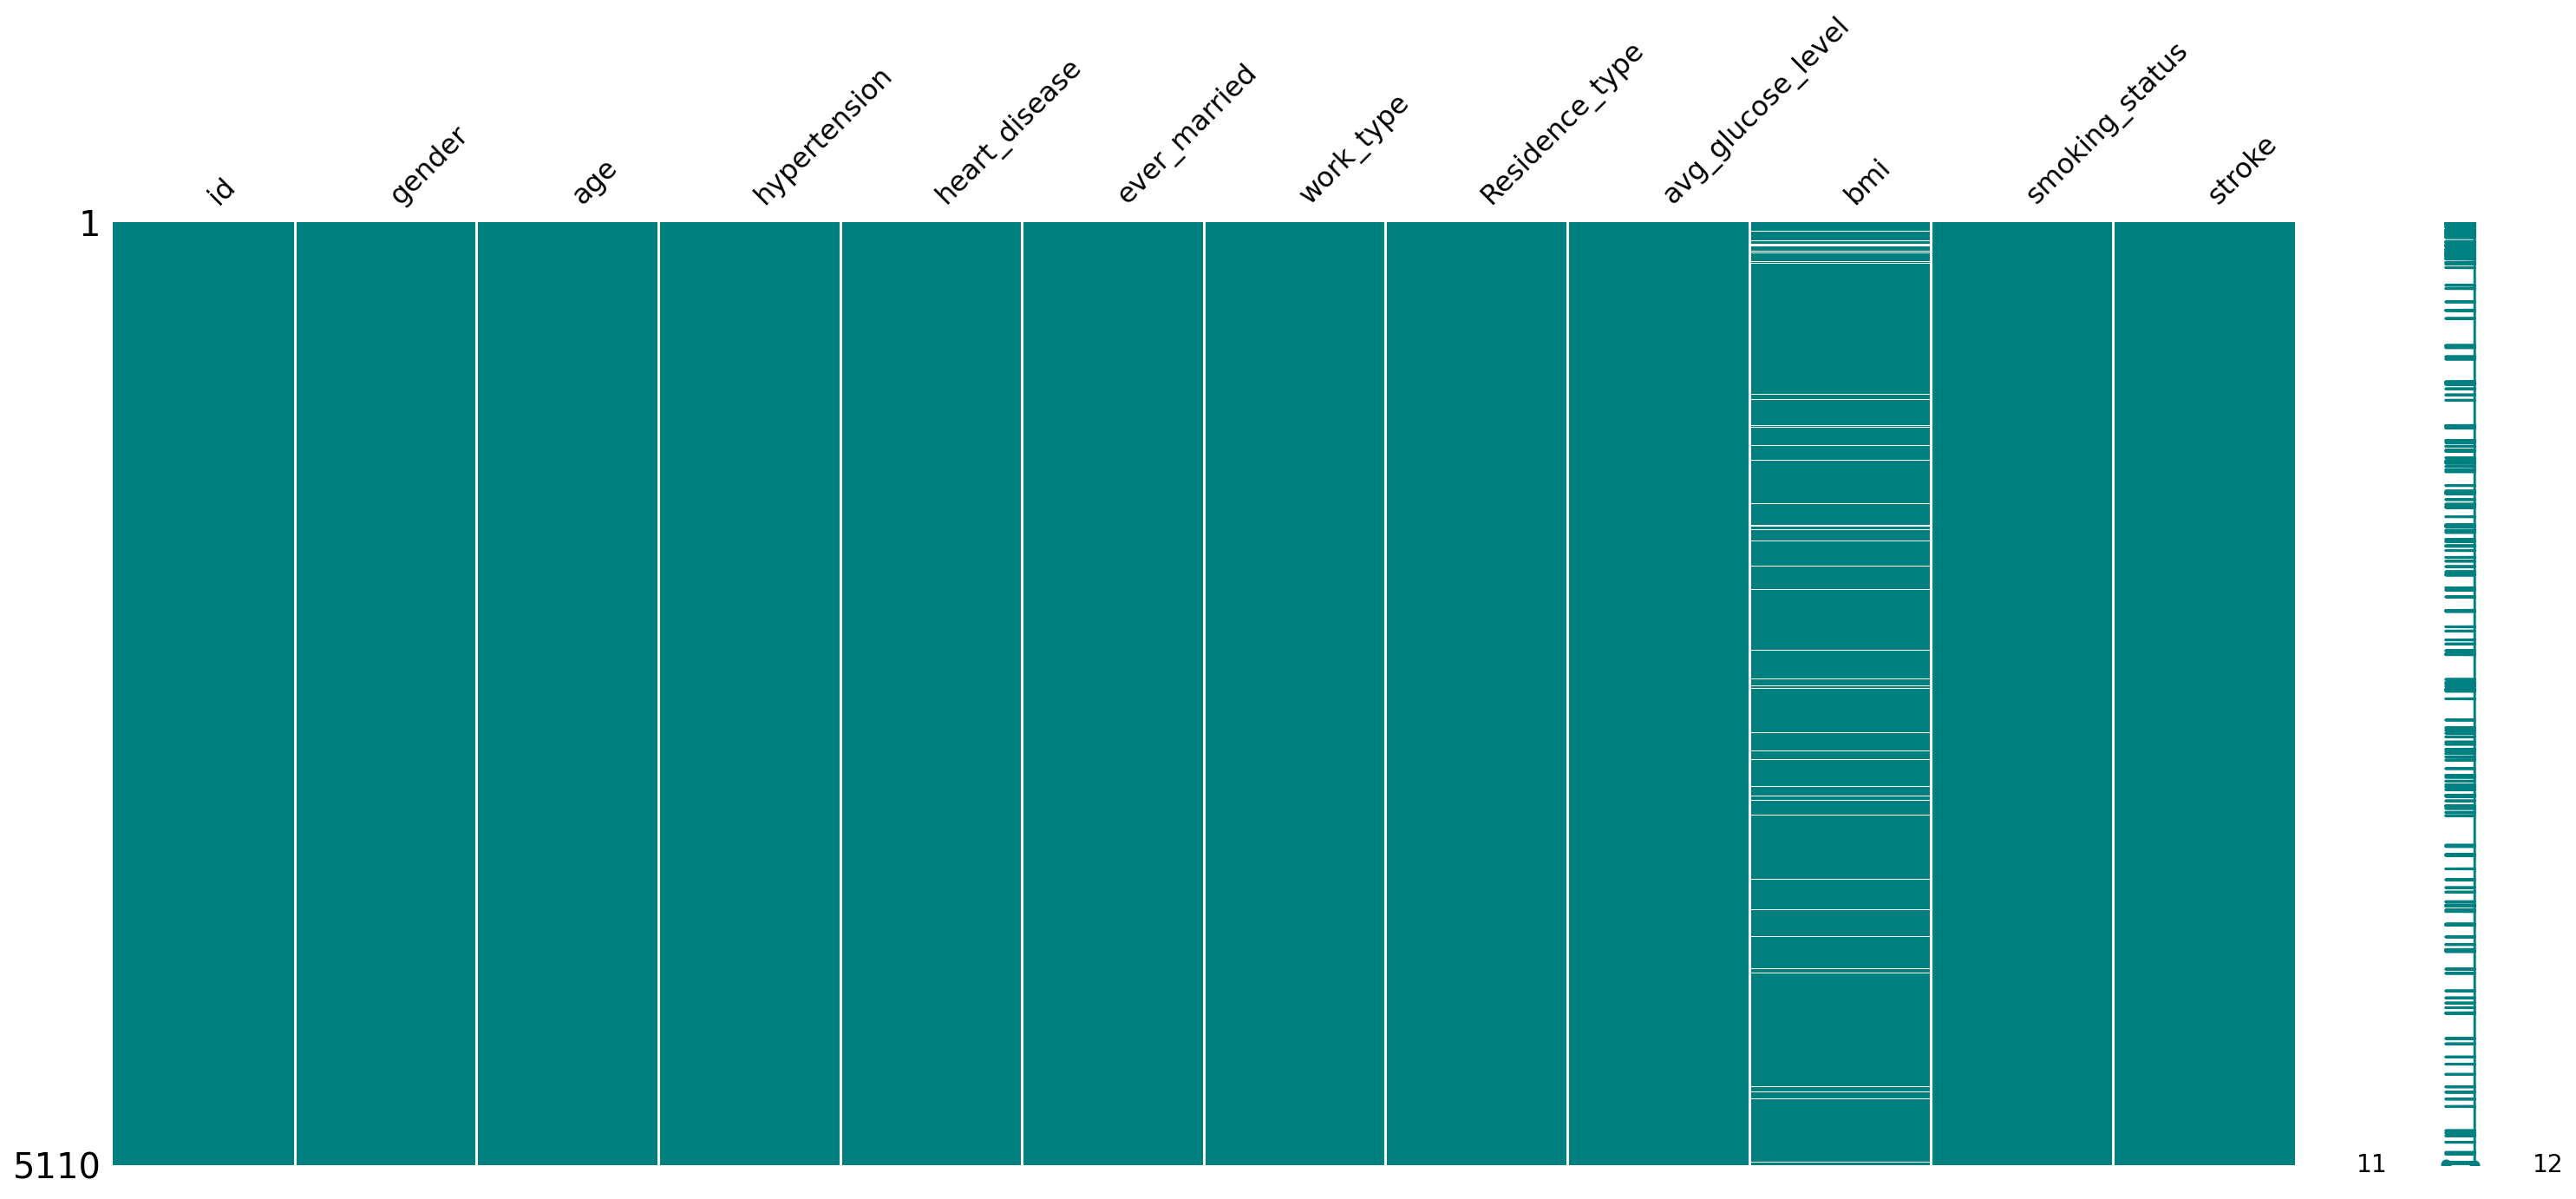

In [ ]:
fig = msno.matrix(stroke,color=(0,0.5,0.5))

Dado que la única característica con valores ausentes es `bmi` pasamos a completar dichos valores. Dado que se trata de una variable de tipo numérico exploramos la posibilidad de completar dichos valores con la mediana de los datos observados (para esa variable), ya que dicha medida se ve menos alterada por la presencia de observaciones ausentes. Evaluamos la imputación calculando la media para dicha variable antes y después de la imputación.

In [ ]:
# Obtenemos el valor de la media antes de la imputación
stroke[['bmi']].mean()

bmi    28.893237
dtype: float64

In [ ]:
# Configuramos el entorno de imputación con la mediana
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# Imputación de valore
stroke[['bmi']] = imp.fit_transform(stroke[['bmi']])
# verificación de que ya no hay valores faltantes
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Valor de la media tras la imputación
stroke[['bmi']].mean()

bmi    28.862035
dtype: float64

Podemos ver como la estimación de la media es muy similar a la que teníamos antes de la imputación, con lo que dicho proceso nos ofrece cierta confiabilidad en que la imputación no ha alterado el comportamiento original de los datos.

La función `SimpleImputer` también nos permite imputar valores en características de tipo categórico, solo que en este caso deberemos utilizar el parámetro `most_frequent` o `constant`, al no disponer de valores numéricos para la evaluación de la media o mediana. Veamos un pequeño ejemplo:

In [ ]:
# Cargamos los datos
datos = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"],
                    [np.nan, np.nan],
                    ["a", "z"]], dtype="category")
# Definimos entorno de imputación con el valor más frecuente
imp = SimpleImputer(strategy="most_frequent")
# Vemos el resultado obtenido
print(imp.fit_transform(datos))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']
 ['a' 'y']
 ['a' 'z']]


Observamos que a los datos faltantes les asigna el valor de la clase predominante de la columna, que en este caso es el valor *`a`* en la primera columna y el valor *`y`* en la segunda.

#### Multivariante

Un enfoque más sofisticado es usar la función `IterativeImputer`, que modela cada variable con valores faltantes como una función de otras variables y usa esa estimación para la imputación. Lo hace de forma iterativa: en cada paso, una variable se designa como salida $y$ y las otras variables se tratan como entradas $X$. Se ajusta una regresión de $X$ en $y$ y se usa para predecir los valores faltantes de $y$. Esto se hace para cada variable de manera iterativa y luego se repite para varias rondas de imputación tras haber realizado la imputación `max_iter`. Se devuelven los resultados de la ronda de imputación final.

En este [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) se pueden consultar todos los parámetros para la imputación multivariante. 

##### Ejemplo 5

En este ejemplo utilizamos la configuración por defecto. Para valorar el proceso de imputación calculamos las medias de las características con valores ausentes antes y después de la imputación.

In [ ]:
# Tabla de datos
X = pd.DataFrame([[np.nan, 2, 3], 
     [4, np.nan, 6], 
     [10, np.nan, 9],
     [6, 8, 7],
     [10, 6, 5]])
# Medias antes de imputación
X.apply(np.mean)

0    7.500000
1    5.333333
2    6.000000
dtype: float64

In [ ]:
# Configuramos el entorno de imputación con la media
imp = IterativeImputer()
# Imputación y presentación del nuevo conjunto de datos
X = pd.DataFrame(imp.fit_transform(X))
X

,0,1,2
0,7.472902,2.000000,3.0
1,4.000000,5.774341,6.0
2,10.000000,12.451317,9.0
3,6.000000,8.000000,7.0
4,10.000000,6.000000,5.0


Obtenemos ahora las medias tras la imputación, que apenas han variado para las columnas 0 y 2, aunque sí cambia para la columna 1.

In [ ]:
X.apply(np.mean)

0    7.494580
1    6.845132
2    6.000000
dtype: float64

## <font color="steelblue">Variables categóricas</font>

Las tareas habituales en el preprocesado de variables de tipo categórico tienen que ver fundamentalmente con el cambio de nombre, la recodificación y la codificación de categorías con etiquetas numéricas. Trataremos como un caso especial la la codificación en caliente (*hot-encoding*) para la creación de variables predictoras numéricas binarias (con valores 0 o 1) a partir de las clases de una variable categórica. La codificación con etiquetas numéricas es necesaria para los modelos de aprendizaje automático, pues estos requieren siempre de variables predictoras numéricas.

Trabajamos con las funciones:
* ``rename`` para renombrar
* ``replace`` para recodificar




### Renombrar

En muchas ocasiones los nombres originales de las variables no son apropiados (generalmente por contener caracteres no recomendables como "-", "*", etc.) , o simplemente interesa simplificarlos para su tratamiento en modelos de aprendizaje automático. Se procede entonces a renombrarlas. Esta tarea se puede hacer tanto para variables numéricas como  categóricas, pero en estas últimas resulta más relevante puesto que ese nombre se utilizará como raíz de las nuevas variables que crearemos con la codificación en caliente (*hot-encoding*). 

Para renombrar las variables utilizamos la función `rename` donde debemos indicar las columnas a modificar (`columns`) y si lo queremos que los cambios se apliquen sobre las mismas variables (`inplace=True`),

Utilizamos la tabla de datos `mushrooms` para renombrar algunas variables, donde a la variable original le atribuimos el nuevo nombre a modo de diccionario: a la variable 'class' la renombramos comom 'classes', y en otras con el carácter "-", que se puede confundir con la operación resta, como 'car-shape', se sustituye el caracter '-' por '_'.

In [ ]:
# Renombramos algunas variables indicando el nombre antiguo y el nuevo. 
mushrooms.rename(columns={'class': 'classes',
                          'cap-shape': 'cap_shape',
                          'ring-number': 'ring_number', 
                          'ring-type': 'ring_type', 
                          'spore-print-color': 'spore_print_color'}, 
                 inplace=True)

### Recodificar

Hablamos de recodificación cuando cambiamos o reagrupamos los niveles de una variable categórica. Por ejemplo, en la base de datos anterior,  las respuestas de muchas de las variables vienen codificadas originariamente con una inicial de la cadena de texto correspondiente. Aunque esta opción es interesante para la introducción de datos (la simplifica), resulta poco útil para facilitar la lectura e interpretación de los resultados de los análisis. 

Para la recodificación de etiquetas usamos la función `replace`, en la que debemos indicar los valores antiguos y los nuevos para cada una de las variables de interés.
Veamos su funcionamiento con un ejemplo. 


In [ ]:
# Etiquetas originales en la variable 'classes'
np.unique(mushrooms['classes'])

array(['edible', 'poisonous'], dtype=object)

In [ ]:
# Recodificación de etiquetas con sus significados
mushrooms.classes.replace({"e": "edible", 
                           "p": "poisonous"}, 
                          inplace=True)
np.unique(mushrooms['classes'])

### Codificar variables ordinales

En muchas ocasiones las clases o niveles de las variables de tipo categórico llevan implícito un orden, como por ejemplo cuando registramos el nivel de gravedad de una enfermedad. En esas situaciones es recomendable indicar que dicha variable es de tipo ordinal y no nominal. 

La función que usamos para dicha codificación es `OrdinalEncoder` dentro del módulo `sklearn.preprocessing`. Por defecto, el orden introducido es el alfanumérico, de modo que si nuestras etiquetas originales no están ordenadas alfabéticamente, la codificación obtenida no dará el orden deseado. 

Si queremos codificar las columnas de un dataframe con órdenes preestablecidos diferentes, procederemos columna a columna, sustituyendo la variable original o añadiendo la nueva variable a la tabla de datos.

#### Ejemplo 6

Veamos un ejemplo simulado donde tenemos una variable categórica con valores posible `Low`, `Medium`, y `High`. En este caso deseamos crear una nueva variable codificada que respete el orden natural de las categorías, 'Low'<'Medium'<'High'.

In [ ]:
# Cargamos el módulo y la función correspondiente
from sklearn.preprocessing import OrdinalEncoder
# Datos
X = [['Low'], ['Medium'], ['High'], ['Medium'], ['Low'], ['High']]
# Definimos el entorno de codificación
enc = OrdinalEncoder()
# y lo aplicamos a X
Xcode=enc.fit_transform(X)
Xcode

array([[1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.]])

Al aplicar la codificación por defecto y usar el orden alfabético, surge la codificación 'Low'=1, 'Medium'=2 y 'High'=0, de modo que no s consigue el orden esperado. Si queremos un orden específico, hemos de forzarlo. Veamos cómo.

In [ ]:
# Definimos el orden
cats = [['Low', 'Medium', 'High']]
# Establecemos el entono de codificación
enc = OrdinalEncoder(categories=cats)
# Resultado de la codificación
Xcode = enc.fit_transform(X)
Xcode

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

### Codificar en caliente (hot-encoding)

Scikit-Learn sólo permite trabajar con características numéricas. Esto implica que cuando trabajamos con variables categóricas hemos de transformarlas en numéricas. Para ello, creamos variables ficticias de ceros y unos (*dummies*), proceso que se conoce en la literatura como  *one-hot encoding* o codificación en caliente. Este proceso consiste en crear tantas nuevas variables como clases distintas tiene la variable de interés, de forma que el valor de la columna correspondiente a cadaa categoría se establecerá en 1 si la muestra se corresponde con esa clase y 0 en otro caso.

Para la creación de estas variables podemos utilizar las funciones de `Pandas` o, como veremos aquí, las funciones de preprocesado específicas de la librería `Scikit-Learn`. En concreto utilizamos el módulo [``sklearn.preprocessing``](https://scikit-learn.org/stable/modules/preprocessing.html) que incorpora la función [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

#### Ejemplo 7

Veamos, a través de ejemplos, cómo proceder para la codificación en caliente. 

In [ ]:
# Importamos la función OneHotEncoder
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
# Introducimos unos datos de prueba simulados
X = np.array(['USA','Australia', 'UK', 'UK','USA','Australia','USA',
                  'UK', 'UK','UK','Australia'])
X

array(['USA', 'Australia', 'UK', 'UK', 'USA', 'Australia', 'USA', 'UK',
       'UK', 'UK', 'Australia'], dtype='<U9')

Creamos las nuevas variables *dummy* a partir de las clases registradas. Este proceso se estructura en dos pasos:

* Configuramos el codificador de forma que cada columna representa una clase de la variable categórica, ordenada por orden alfanumérico. 
* Creamos las variables ficticias binarias asociadas.

In [ ]:
# Modificamos el array para convertirlo en columna
X = X.reshape(-1,1)
# Configuramos el codificador
encoder = OneHotEncoder()
encoder_fit = encoder.fit(X)
# Codificamos de los datos
encoder_fit.transform(X).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

En esta nueva matriz de ceros y unos, los unos de la primera columna identifican registros de la clase 'Australia', mientras que en la segunda y la tercera hacen referencia a las clases 'UK' y 'USA' respectivamente. En muchas ocasiones, sobre todo en la construcción de modelos estadísticos, la opción más interesante es eliminar una de las variables, ya que conociendo las otras dos es posible obtener la que falta. Para ello utilizamos el parámetro `drop = 'first'` dentro del configurador. Veamos cómo funciona para el mismo ejemplo.

In [ ]:
# Configurar el codificador
encoder = OneHotEncoder(drop='first')
# Codificación
encoder_fit = encoder.fit_transform(X).toarray()
encoder_fit

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.]])

El resultado son las dos últimas columnas de la matriz anterior. 

En cuadernos posteriores veremos cómo utilizar esta codificación para el entrenamiento de los modelos de aprendizaje automático. En el apartado de *pipeline* volvemos a aplicar la codificación en caliente sobre la tabla de datos `stroke`.

## <font color="steelblue">Variables numéricas</font>

Presentamos a continuación las tareas más habituales en el preprocesado de variables predictoras de tipo numérico, que son: 

* Estandarización y normalización.
* Discretización para la conversión a variables categóricas ordinales.
* Transformación de variables.

### Estandarizar y normalizar

Muchos algoritmos de aprendizaje automático implementados en Scikit-Learn necesitan variables predictoras estandarizadas (o normalizadas) para alcanzar una convergencia más rápida que los datos de partida. Por este motivo en la práctica siempre transformamos los datos para centrarlos en su media (eliminando así el valor medio de cada característica) y escalarlos (dividiendo las características no constantes por su desviación estándar). Este proceso se llama **estandarización**.

Por otro lado, el proceso de **normalización** es una técnica de escalado de las variables para que tengan norma 1. Este proceso se utiliza habitualmente en los métodos de clasificación de textos o agrupación.


El módulo [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) contiene varias funciones para estos procesos:

- la función  [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) proporciona una forma rápida y fácil de realizar la estandarización en un conjunto de datos,
- la función [`normalize`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) permite diferentes opciones de normalización según la norma utilizada. Dado un vector con componentes $x = (x_1,...,x_n)$ se consideran las normas:

  - 'l1' o suma de los valores absolutos: 

  $$||x||_{1} = \sum_{i=1}^n |x_i|$$

  - 'l2' o raíz cuadrada de la suma de cuadrados:

  $$||x||_{2} = \sqrt{\sum_{i=1}^n x_i^2}$$

  - 'max' o máximo de los valores: 

  $$||x||_{max} = max(x_i)$$


  Para cualquiera de las normas consideradas el vector normalizado se obtiene como:

  $$x_{norm} = \frac{x}{||x||}$$

#### Ejemplo 8



A continuación mostramos sobre un conjunto de datos simulados el funcionamiento de los procesos de estandarización o normalización. En primer lugar cargamos el módulo de preprocesamiento.

In [ ]:
# Importamos preprocessing
from sklearn import preprocessing

In [ ]:
# Creamos la matriz de datos 
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [ ]:
# Calculamos las medias y desviaciones típicas por columnas que son utilizadas en la estandarización
X.mean(axis=0)

array([1.        , 0.        , 0.33333333])

In [ ]:
X.std(axis=0)

array([0.81649658, 0.81649658, 1.24721913])

Configuramos la estandarización y devolvemos el resultado en una nueva matriz escalada.

In [ ]:
# Estandarización
X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Para verificar la eficacia de la estandarización, obtenemos las medias y desviaciones típicas de las nuevas columnas de la matriz de datos, que han de ser 0 y 1 respectivamente.

In [ ]:
# calculamos la media y la desviación
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [ ]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Acudimos ahora a un proceso de normalización. 

In [ ]:
# Norma L1
X_normalized = preprocessing.normalize(X, norm='l1')
X_normalized

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [ ]:
# Norma L2
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
# Norma max
X_normalized = preprocessing.normalize(X, norm='max')
X_normalized

array([[ 0.5, -0.5,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -1. ]])

### Discretizar

En muchas aplicaciones prácticas se registran variables de tipo numérico que más tarde deben ser agrupadas en intervalos debido a los objetivos que se persiguen. Por ejemplo, supongamos que tenemos un sujeto que sufre cierta enfermedad y queremos establecer el nivel de gravedad a partir del valor numérico de un análisis de sangre. Discretizar esa variable numérica y convertirla en una categórica ordinal nos permitirá luego, clasificar a los sujetos más graves y diferenciarlos de los menos graves.

Generalmente discretizamos generando una variable dicotómica (grave/no grave en el ejemplo anterior) o una con varias categorías que representan los niveles de gravedad. Cuando este es el caso, podemos: 

* rijar los valores mínimo y máximo de la variable numérica, así como el número de intervalos que queremos obtener, para conseguir intervalos de igual longitud;
* fijar los intervalos, es decir, los puntos de corte que separan las categorías consecutivas.

En ambos casos resulta de interés almacenar esa nueva variable en el banco de datos, para poder utilizarla posteriormente en otros análisis.

Estas tareas se pueden realizar utilizando las funciones la librería `Pandas` `cut(dataframe.variable, bins, include_lowest, right)` e `interval_range(start, end, freq, name, closed)`. Sin embargo, aquí utilizaremos las funciones de Scikit-Learn diseñadas para este proceso: 

- [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer), para una discretización binaria o dicotómica de una característica (grave/no grave).

- [`KBinsDiscretizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer), para una discretización múltiple en varios intervalos (niveles de gravedad), ayudada de las funciones `pcut` de `Pandas` para establecer los puntos de corte, y la función `FunctionTransformer` de `Scikit-Learn` para obtener la discretización.




#### Ejemplo 9

Veamos cómo utilizar estas funciones sobre una tabla de datos simulados.

In [ ]:
# importamos la librería random
import random
# con la que fijamos una semilla para la generación de aleatorios
random.seed(4)
# Simulamos una matriz de datos de dimensiones 10x5 con valores positivos y negativos
# a partir de valores uniformes (0,1), restando 0.5
X =  np.random.rand(10,5) - 0.5
X

array([[ 0.28869005, -0.15055208,  0.35128038,  0.03102844, -0.26751991],
       [ 0.28002856,  0.0453676 , -0.16879453,  0.3562572 ,  0.43902529],
       [ 0.26869651,  0.48732423, -0.20915532,  0.00264273, -0.14114556],
       [-0.04027582,  0.4253867 , -0.1390946 ,  0.20414392,  0.05360905],
       [ 0.13974315,  0.0384432 ,  0.24538786,  0.15546702, -0.04425632],
       [ 0.43363215, -0.32653013, -0.03787659,  0.32848549, -0.30260259],
       [ 0.08945717,  0.26595599, -0.34771581,  0.09286221,  0.11289941],
       [ 0.11758286, -0.15117427,  0.28674385,  0.44669037, -0.41146172],
       [-0.21366401, -0.30449505, -0.29174665, -0.03594745,  0.48256425],
       [ 0.17166348, -0.02459135, -0.03046717,  0.10751078,  0.32159335]])

Procedemos primero con la discretización binaria, utilizando como valor de corte el 0:

In [ ]:
# Importamos preprocessing
from sklearn import preprocessing
binarizer = preprocessing.Binarizer(threshold=0)
binarizer.transform(X)

array([[1., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1.]])

Para llevar a cabo una discretización múltiple sobre el mismo conjunto de datos debemos considerar el número de intervalos que queremos o los valores de discretización (2 o más) para la creación de la nueva variable codificada. Consideramos dos situaciones:

1. Fijamos el número de intervalos a 3 intervalos y es el algoritmo el que establece los cortes para generar intervalos de amplitud idéntica.
1. Establecemos los límites de los intervalos:  
$$(-\infty, -0.5), [-0.5, 0), [0, 0.5), [0.5,\infty),$$ es decir fijamos como valores de discretización -0.5, 0, y 0.5, de forma que valores por debajo de -0.5 se codifican con 0, entre -0.5 y 0 se codifican con 1, entre 0 y 0.5 se codifican con 2, y por encima de 0.5 con un 3.

En este segundo caso utilizamos la función `pcut` de `Pandas` para establecer los puntos de corte, y la función `FunctionTransformer` de `Scikit-Learn` para obtener la discretización.

In [ ]:
# Importamos preprocessing
from sklearn import preprocessing
# Fijamos el número de intervalos (n_bins =3) y construimos la variable ordinal correspondiente
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal').fit_transform(X)
est

array([[2., 1., 2., 0., 0.],
       [2., 2., 1., 2., 2.],
       [2., 2., 0., 0., 1.],
       [0., 2., 1., 2., 1.],
       [1., 1., 2., 1., 1.],
       [2., 0., 1., 2., 0.],
       [0., 2., 0., 1., 2.],
       [1., 0., 2., 2., 0.],
       [0., 0., 0., 0., 2.],
       [1., 1., 2., 1., 2.]])

Dado que hemos creado tres intervalos, todos los datos son codificados con valores 0, 1 y 2.

Veamos ahora la discretización con los extremos predefinidos. En este caso se debe discretizar cada columna por separado, ya que no es posible hacerlo directamente de forma conjunta sobre una matriz. 

In [ ]:
# simulamos lo que sería una columna en la tabla de datos
X = 2*np.random.rand(50) - 0.5
X

array([ 1.05485978,  1.24924737,  1.27450085,  0.87919057,  0.58616202,
        0.2993088 , -0.49530802,  1.34880325,  0.75306562,  0.9689084 ,
        0.82593145, -0.07838704,  1.05588854,  0.24974553,  0.79537669,
       -0.34508541,  0.0026511 ,  1.15664994,  1.38887338, -0.20521008,
       -0.30020071,  0.90756552,  0.82244483, -0.47786107,  0.55514593,
        0.69175587, -0.26955441,  0.3919671 , -0.28019771,  1.32534505,
        0.92131005, -0.26121433,  0.07148044,  0.86538   ,  0.14118945,
        0.17704477, -0.2714042 ,  0.17060183,  0.61336789,  0.71391274,
       -0.3104365 ,  0.34631028,  0.94576712,  1.41285535, -0.18448113,
        0.66764503,  1.19793882,  0.81569572,  1.30524347, -0.28385809])

In [ ]:
# Establecemos los límites de los intervalos
bins = [-np.inf, -0.5, 0, 0.5, np.inf]
# Establecemos etiquetas para los intervalos
labels = ['(,-0.5)', '[-0.5,0)', '[0, 0.5)', '[0.5,)']
# Función de transformación basada en los límites y etiquetas
transformer = preprocessing.FunctionTransformer(
     pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False})
# Discretización
Xtr = transformer.fit_transform(X)
Xtr

['[0.5,)', '[0.5,)', '[0.5,)', '[0.5,)', '[0.5,)', ..., '[0.5,)', '[0.5,)', '[0.5,)', '[0.5,)', '[-0.5,0)']
Length: 50
Categories (4, object): ['(,-0.5)' < '[-0.5,0)' < '[0, 0.5)' < '[0.5,)']

Así las intervalos en que se ha categorizado la variable original, junto con las frecuencias observadas en cada uno de ellos son:

In [ ]:
# Contamos el número de valores en cada intervalo
np.unique(Xtr, return_counts = True)

(array(['[-0.5,0)', '[0, 0.5)', '[0.5,)'], dtype=object), array([10, 13, 27]))

### Transformar

En este apartado vemos con detalle cómo definir funciones de transformación sobre las características de nuestra tabla de datos, si bien ya en el punto anterior hemos utilizado esta función para conseguir discretizar una variable con unos valores prestablecidos.

#### Funciones

A veces, resulta necesario realizar una transformación sobre las característica numéricas de nuestra tabla de datos para por ejemplo conseguir linealizar una relación entre dos variables. En Scikit-Learn disponemos de la función [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer), que nos permite realizar distintos tipos de transformaciones complejas. Se recomienda visitar la ayuda de la función para conocer todas las posibilidades de transformaciones.

Para transformaciones sencillas podemos utilizar las funciones en las librerías `Numpy` y `Math`.



In [ ]:
# Importamos la función 
from sklearn.preprocessing import FunctionTransformer
# creamos el entorno de transformación con la función logaritmo neperiano
transformer = FunctionTransformer(np.log1p, validate=True)
# definimos una matriz
X = np.array([[0, 1], [2, 3]])
# sobre la que aplicamos íntegramente la transformación
X_transform = transformer.fit_transform(X)
X_transform

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

#### Efectos polinómicos

A menudo, es útil agregar complejidad a un modelo al considerar el comportamiento no lineal de los datos de entrada, sustituyendo los predictores numéricos originales, por predictores polinómicos. Mostramos dos posibilidades: la primera usa polinomios puros, mientras que la segunda usa *splines*, es decir, polinomios a trozos. Estas transformaciones añaden nuevas características a nuestra tabla de datos, en las que vienen recogidos los efectos polinómicos.

Comenzamos con la situación más sencilla, en la que queremos añadir efectos polinómicos para las variables originales. Este proceso se puede implementar con Scikit-Learn mediante la función [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures). 

##### Ejemplo 10. Polinomios

Consideramos, para ejemplificar el uso de esta función, un problema sencillo en el que partimos de dos variables, a las que deseamos añadir las posibles tendencias cuadráticas asociadas a ellas, es decir, tenemos $(X_1, X_2)$ y queremos obtener la matriz $(1, X_1, X_2, X_1^2, X_1X_2, X_2^2)$ que nos permitirá capturar tendencias cuadráticas en el tratamiento de datos.


In [ ]:
# Importamos la función necesaria
from sklearn.preprocessing import PolynomialFeatures

# creamos la matriz de datos de dimensiones 10x2, redondeando a 2 decimales
X = np.round(np.random.rand(10,2), decimals =2)
X

array([[0.4 , 0.49],
       [0.31, 0.29],
       [0.74, 0.58],
       [0.51, 0.6 ],
       [0.17, 0.65],
       [0.48, 0.36],
       [0.08, 0.84],
       [0.72, 0.54],
       [0.39, 0.95],
       [0.86, 0.6 ]])

In [ ]:
# Creamos el polinomio de grado 2
poly = PolynomialFeatures(2)
# y aplicamos la transformación pretendida
Xpoly = poly.fit_transform(X)
Xpoly

array([[1.    , 0.4   , 0.49  , 0.16  , 0.196 , 0.2401],
       [1.    , 0.31  , 0.29  , 0.0961, 0.0899, 0.0841],
       [1.    , 0.74  , 0.58  , 0.5476, 0.4292, 0.3364],
       [1.    , 0.51  , 0.6   , 0.2601, 0.306 , 0.36  ],
       [1.    , 0.17  , 0.65  , 0.0289, 0.1105, 0.4225],
       [1.    , 0.48  , 0.36  , 0.2304, 0.1728, 0.1296],
       [1.    , 0.08  , 0.84  , 0.0064, 0.0672, 0.7056],
       [1.    , 0.72  , 0.54  , 0.5184, 0.3888, 0.2916],
       [1.    , 0.39  , 0.95  , 0.1521, 0.3705, 0.9025],
       [1.    , 0.86  , 0.6   , 0.7396, 0.516 , 0.36  ]])

Cuando no nos interesan los efectos cuadráticos $(X_1^2,X_2^2)$ pero sí las interacciones entre dos predictores, recogidas a través de su producto, $X_1 \cdot X_2$, también podemos calcular la matriz $(1, X_1, X_2, X_1X_2)$ con esta función, especificando el argumento `interaction_only=True`.

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly.fit_transform(X)

array([[1.    , 0.4   , 0.49  , 0.196 ],
       [1.    , 0.31  , 0.29  , 0.0899],
       [1.    , 0.74  , 0.58  , 0.4292],
       [1.    , 0.51  , 0.6   , 0.306 ],
       [1.    , 0.17  , 0.65  , 0.1105],
       [1.    , 0.48  , 0.36  , 0.1728],
       [1.    , 0.08  , 0.84  , 0.0672],
       [1.    , 0.72  , 0.54  , 0.3888],
       [1.    , 0.39  , 0.95  , 0.3705],
       [1.    , 0.86  , 0.6   , 0.516 ]])

Otra forma de añadir complejidad en los predictores consiste en generar *splines*, a partir de ellos. Los splines son polinomios a trozos parametrizados por un grado polinómico y las posiciones de los nodos que definen los cortes de los trozos. La función `SplineTransformer` implementa una base *B-spline*, que  trata cada variable por separado, es decir, no genera términos de interacción.

Algunas de las ventajas de los splines sobre los polinomios son:

* Los *B-splines* son muy flexibles y robustos si se mantiene un grado bajo fijo, normalmente 3, y se adapta parsimoniosamente el número de nodos. Los polinomios por lo general un grado más alto para adaptar datos con cierta sinuosidad, lo que nos lleva al siguiente punto.

* Los *B-splines* no tienen un comportamiento oscilante en los límites como los polinomios (cuanto más alto sea el grado, peor). Esto se conoce como el fenómeno de *Runge*.


A continuación vemos un ejemplo sobre cómo obtener la transformación de splines.

##### Ejemplo 11. Splines


In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Generamos una columna de datos
X = np.arange(10).reshape(10, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
# Cargamos el módulo
from sklearn.preprocessing import SplineTransformer
# Preparamos la transformación con una base de grado 2, y con 3 nodos
spline = SplineTransformer(degree=2, n_knots=3)
# Resultado de la transformación
spline.fit_transform(X)

array([[1.61078238e-02, 6.47271532e-01, 3.36620644e-01, 0.00000000e+00,
        7.75941230e-02, 7.38751148e-01, 1.83654729e-01, 0.00000000e+00],
       [8.41551611e-02, 7.41946088e-01, 1.73898751e-01, 0.00000000e+00,
        5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.73372781e-02, 7.13017751e-01, 2.39644970e-01,
        7.34618916e-03, 6.06519743e-01, 3.86134068e-01, 0.00000000e+00],
       [0.00000000e+00, 4.02695595e-01, 5.92044707e-01, 5.25969757e-03,
        1.83654729e-03, 5.56932966e-01, 4.41230487e-01, 0.00000000e+00],
       [2.95857988e-01, 6.77514793e-01, 2.66272189e-02, 0.00000000e+00,
        0.00000000e+00, 4.13223140e-01, 5.82644628e-01, 4.13223140e-03],
       [0.00000000e+00, 4.74687705e-01, 5.24983563e-01, 3.28731098e-04,
        3.10376492e-01, 6.67125803e-01, 2.24977043e-02, 0.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.55555556e-02, 7.22222222e-01, 2.

Genera pues una matriz que contiene, para cada fila, los coeficientes de $(X,X^2)$ en cada uno de los 4 trozos generados por los 3 nodos.

## <font color="steelblue">División de muestras: entrenamiento y validación</font>

Un aspecto relevante en todos los modelos de aprendizaje automático es el entrenamiento del modelo con una muestra de datos razonablemente grande y denominada **muestra de entrenamiento**, y su posterior evaluación, con otra muestra que no se ha utilizado en el entrenamiento y que se utiliza para verificar la calidad del modelo obtenido para predecir datos que no han sido utilizados para entrenar el modelo, y que se denomina **muestra test**. Para ello es necesario dividir el conjunto de datos en dos partes o submatrices de muestras. 

Para obtener la división de muestras de entrenamiento y validación utilizamos la función `train_test_split` del módulo `sklearn.model_selection`. A continuación mostramos su funcionamiento sobre un banco de datos simulados. Tan sólo debemos fijar el porcentaje de muestras o datos a incluir en la muestra test.

In [ ]:
# Importamos el módulo y la función correspondiente
from sklearn.model_selection import train_test_split

# Generamos la tabla de predictoras (100*20) y el vector de respuesta (100*1)
X = np.round(np.random.rand(100,20), decimals =2)
y = np.round(np.random.rand(100,1), decimals =2)

La matriz de datos contiene 100 muestras y 20 variables mientras que el vector de respuesta tiene 100 muestras.  Fijamos un 25% de datos para la muestra de validación, el valor de la semilla para la selección (aleatoria de datos) en ambos conjuntos, y obtenemos las correspondientes submuestras o subconjuntos de datos, con las proporciones asignadas: 75% para entrenar y 25% para validar.

In [ ]:
# División de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Monitorizamos las dimensiones de cada subconjunto
print(X_train.shape); print(y_train.shape)
print(X_test.shape); print(y_test.shape)

(75, 20)
(75, 1)
(25, 20)
(25, 1)


## <font color="steelblue">Preprocesado integral con Pipeline</font>

El *pipeline* puede utilizarse para encadenar varios procesos de tratamiento de los datos o incluso diferentes modelos de aprendizaje con un código único y simplificado. Esto es útil porque a menudo hay una secuencia fija de pasos en el procesamiento de los datos, por ejemplo, la selección de características, la normalización y la clasificación. En este caso, los *pipeline* nos permiten estructurar de forma más limpia las tareas de preprocesado en una tabla de datos específica.



### Ejemplo 12


A continuación vemos cómo utilizar `pipeline` para el preprocesado de la tabla de datos `stroke`. En concreto organizamos todas las tareas correspondientes a la identificación de tipos, tratamiento de variables predictoras numéricas (imputación y estandarización), y tratamiento de variables predictoras categóricas (imputación y codificación). 


El primer paso es cargar la base de datos e identificar los tipos de todas las variables. Las de tipo 'object' e 'int64' son convertidas a categóricas.

In [1]:
# Lectura de datos originales y transformación de tipos
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/stroke_ori.csv'
stroke = pd.read_csv(url)

# Establecimiento de tipos
# Seleccionamos los nombres de la columnas de tipo 'object' 
cat_names = stroke.select_dtypes(include=['object']).columns.values
# Convertimos dichas columnas a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")
# Seleccionamos los nombres de la columnas que corresponden con el tipo int64 que son cualitativas 
cat_names = stroke.select_dtypes(include=['int64']).columns.values
# Convertimos dichas columnas a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")


NameError: ignored

Cargamos los módulos necesarios e identificamos las variables predictoras que serán sometidas al preprocesado. Si por ejemplo tenemos una variable de índice o si la variable objetivo está incluida en el banco de datos, debemos quitar dichas variables del preprocesado para que tratemos sólo las variables que sean necesarias para la construccicón del modelo de aprendizaje. Para el banco de datos `stroke` debemos quitar las variables `id` y `stroke`.

In [ ]:
# Reconocemos la variable 'id' como índice identificador en la tabla de datos
stroke.set_index("id")
# Seleccionamos variables numéricas para estandarización 
num_var = stroke.select_dtypes(include=['float64']).columns.values
# Seleccionamos categóricas para codificación, excluyendo id y stroke
cat_var = stroke.select_dtypes(include=['category']).columns.values[1:8]
print(num_var)
print(cat_var)
# Separamos los datos según variables numéricas y categóricas
stroke_num_var = stroke[num_var]
stroke_cat_var = stroke[cat_var]

Establecemos ahora el pipeline para variables numéricas. En este caso procedemos primero con la imputación y a continuación con la estandarización. Utilizamos la mediana como estrategia de imputación.

In [ ]:
# Cargamos todos los módulos y funciones
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

# Inicializamos el Pipeline
num_var_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='median')), 
                  ('scaler', StandardScaler())         
            ])
# Lo aplicamos a las variables numéricas
num_var_preprocessed = num_var_pipe.fit_transform(stroke_num_var)
# Resultado del preprocesado
num_var_preprocessed

Procedemos ahora con las variables categóricas que, como no teníamos valores pérdidos, la única tarea de preprocesado a realizar es la codificación.

In [ ]:
# Pipeline
cat_var_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])
# Resultado del preprocesado
cat_var_preprocessed = cat_var_pipe.fit_transform(stroke_cat_var)
cat_var_preprocessed

También podemos utilizar los *pipeline* anteriores, diferenciando para cada tipo de variable, con el objetivo de establecer un pipeline conjunto y único para toda la tabla de datos. En este caso debemos pasar como listas las matrices de variables de cada tipo.

In [ ]:
# Lista de variables por tipo
num_list = list(stroke_num_var)
cat_list = list(stroke_cat_var)
# Pipeline conjunto a partir de los pipeline individuales
final_pipe = ColumnTransformer([
   ('num', num_var_pipe, num_list),    
   ('cat', cat_var_pipe, cat_list)                        
])
# Obtenemos el array de datos preprocesados
data_preprocessed = final_pipe.fit_transform(stroke)
data_preprocessed

El problema con el preprocesado en las variables categóricas es que por defecto no aparecen los nombres de las nuevas variables. Resulta necesario extraerlos e integrarlos todos en un dataframe para la correcta implementación de los modelos de aprendizaje automático. Estos nombres de las variables se pueden extraer de los pipeline establecidos. A continuación se muestra el código necesario.

In [ ]:
# Pasos del pipeline
clf = Pipeline(steps=[('preprocessor', final_pipe)])
# Extraemos los nombres utilizando como raíz el nombre de la variable original y como sufijo la etiqueta correspondiente
names_cat = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_list)
names_cat

Construimos a continuación el dataframe con todas las variables, uniendo las variables numéricas y categóricas preprocesadas.

In [ ]:
# Nombres de las variables
names = np.concatenate((num_var, names_cat), axis = None)
# Dataframe completo de datos con variables predictoras
stroke_prepro = pd.DataFrame(data_preprocessed, columns = names)
# se añade la variable respuesta u objetivo
stroke_prepro['stroke'] = stroke['stroke']
# se monitorizan los primeros elementos
stroke_prepro.head()

In [ ]:
# Añadimos tambien la variable 0-1 asociada a la variable objetivo
stroke_prepro['stroke_code'] = stroke_prepro['stroke'].copy()
stroke_prepro.stroke_code.replace({"Yes": 1,  "No": 0}, inplace=True)
# resultado del proceso
stroke_prepro.head()

Guardamos el fichero preprocesado en un fichero .csv, preparado para desarrollar análisis posteriores.

In [ ]:
stroke_prepro.to_csv("stroke_clean.csv", index = False)

Antes de finalizar este apartado es interesante recordar que podemos añadir más funciones de preprocesado dentro de cada pipeline como puede ser: imputaciones en variables categóricas, tendencias polinómicas en variables numéricas, etc... que iremos estudiando en cuadernos posteriores.

# <font color="steelblue">Referencias y enlaces de interés</font>

Los recursos utilizados para elaborar este módulo de aprendizaje han sido:

* https://scikit-learn.org/stable/tutorial/basic/tutorial.html
   
* https://anderfernandez.com/blog/tutorial-sklearn-machine-learning-python/

* Aurélien Géron (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media.

* Peters Morgan (2018). Data Analysis From Scratch With Python: Beginner Guide using Python, Pandas, NumPy, Scikit-Learn, IPython, TensorFlow and Matplotlib. AI Sciences LLC.

* Sebastian Raschka, Vahid Mirjalili (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. Packt Publishing.

* Julian Avila (2017). Scikit-Learn Cookbook: Over 80 Recipes for Machine Learning in Python With Scikit-Learn. Packt Publishing





